# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [57]:
'In effort to avoid making less informed decisions & procuring used vehicles that that garner little interest in their respective marketplace & tie up the monetary resources of a used car dealership and simply reuslt in assets sitting on the lot for extended durations of time without gaining any interest of potential buyers, it is clearly in the best interest of used-car dealerships to engage with data experts who can help pinpoint not only those factors that lead to purchasing used cars that will actually sell, but also those features & elements of a unit that lead to optimal sell price for the deadlership.' 

'In effort to avoid making less informed decisions & procuring used vehicles that that garner little interest in their respective marketplace & tie up the monetary resources of a used car dealership and simply reuslt in assets sitting on the lot for extended durations of time without gaining any interest of potential buyers, it is clearly in the best interest of used-car dealerships to engage with data experts who can help pinpoint not only those factors that lead to purchasing used cars that will actually sell, but also those features & elements of a unit that lead to optimal sell price for the deadlership.'

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [469]:
import pandas as pd
df = pd.read_csv("data/vehicles.csv")
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [470]:
df.head(100)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,7309798041,auburn,2100,2006.0,subaru,impreza,fair,4 cylinders,gas,97000.0,clean,automatic,NaN,NaN,NaN,hatchback,NaN,al
96,7309361405,auburn,80,2004.0,honda,NaN,excellent,6 cylinders,gas,94020.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,al
97,7309271279,auburn,15990,2016.0,NaN,Scion iM Hatchback 4D,good,NaN,gas,29652.0,clean,other,JTNKARJEXGJ517925,fwd,NaN,hatchback,blue,al
98,7309271051,auburn,20590,2013.0,acura,mdx sport utility 4d,good,6 cylinders,gas,77087.0,clean,other,2HNYD2H30DH510846,NaN,NaN,other,silver,al


In [471]:
'As demonstrated above, I would first import the pandas library along with the actual vehicles.csv dataset into my envioronment of choice in order to get a better sense of the avaiable independent variables that have been collected on used car units hisorically sold.  From this point, I would then run the .head() method on the dataframe to get a visual on each of the actual features available to be measured potentially as drivers of predictive sell prices.  From here, I would then run the following command (df.isnull().sum()) to determine if there are any null values in each of the columns/features.  In practice, I was able to determine from run of this method that this dataset has over 5% of its rows that would be wiped out with run of the dropna() function.  For this reason, I would instead to choose to fill those null values w/ the mean/average of each column for each feature.  Additionally, I would consider transforming some more of the categorical data columns/features into numerical values representative of their orignal values.  I have learned first-hand that ML models work better off numerical values in the features of a dataset.'

'As demonstrated above, I would first import the pandas library along with the actual vehicles.csv dataset into my envioronment of choice in order to get a better sense of the avaiable independent variables that have been collected on used car units hisorically sold.  From this point, I would then run the .head() method on the dataframe to get a visual on each of the actual features available to be measured potentially as drivers of predictive sell prices.  From here, I would then run the following command (df.isnull().sum()) to determine if there are any null values in each of the columns/features.  In practice, I was able to determine from run of this method that this dataset has over 5% of its rows that would be wiped out with run of the dropna() function.  For this reason, I would instead to choose to fill those null values w/ the mean/average of each column for each feature.  Additionally, I would consider transforming some more of the categorical data columns/features into numeri

In [472]:
df.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

Maximum price: 300000.0


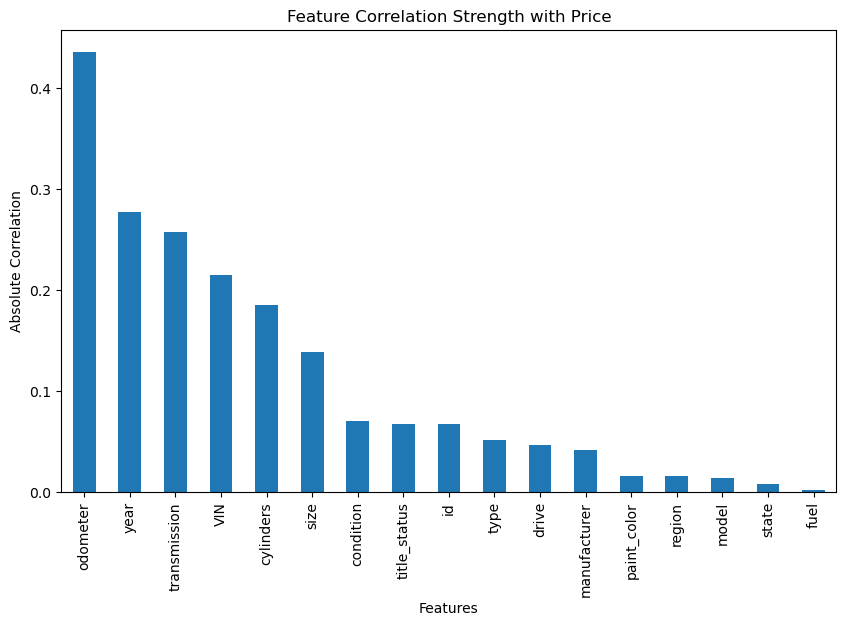

In [508]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

df = df[df['price'] <= 400000]
df = df[df['odometer'] <= 300000]
df['year'].fillna(round(df['year'].mean()))
max_price = df['odometer'].max()
print("Maximum price:", max_price)
columns_to_fill = ['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 
                   'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color']
df[columns_to_fill] = df[columns_to_fill].fillna('missing')
df.isnull().sum()

columns = ['region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 
                   'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color', 'state']
encoder = OrdinalEncoder()
df[columns] = encoder.fit_transform(df[columns])

correlations = df.corr()['price'].drop('price')  # drop self-correlation
abs_correlations = correlations.abs()
abs_correlations = abs_correlations.sort_values(ascending=False)

plt.figure(figsize=(10,6))
abs_correlations.plot(kind='bar')
plt.title('Feature Correlation Strength with Price')
plt.ylabel('Absolute Correlation')
plt.xlabel('Features')
plt.show()

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [517]:
X = df[['odometer', 'year']]
y = df['price']

LinearModel = LinearRegression()
LinearModel.fit(X, y)

LinearRegression()

In [518]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
LinearModel.fit(X_train, y_train)

# Evaluate on the test set
# print(X_test)
y_pred = LinearModel.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(rmse)
print(y_test, y_pred)
print(mse)

13821.537518971905
261998    27995
122908     2900
43264         0
27844     17499
277238    10985
          ...  
7215      43194
137269    18950
115272    17590
34924     33000
13978     29271
Name: price, Length: 83876, dtype: int64 [25746.30576806  4038.6081908  22545.07649729 ... 24661.89545112
 27637.16025739 21587.95254562]
191034899.38834804


In [519]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

ridge_model = Ridge(alpha=1.0)  # You can tune alpha
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
rmse_ridge = np.sqrt(mse)
print(rmse_ridge)
mse = mean_squared_error(y_test, y_pred)
print(mse)

13821.537518971905
191034899.39891487


In [520]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X, y)
y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(rmse)
print(mse)

13821.25576248308
191027110.85197178


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [511]:
'Seeing as our model is producing a RMSE of roughly $14,000 per run, we can assume it is predicting sell price values accurately off of the chief driver feature (odometer reading) for determining sell price in the testing data'

'Seeing as our model is producing a RMSE of roughly $14,000 per run, we can assume it is predicting sell price values accurately off of the chief driver feature (odometer reading) for determining sell price in the testing data'

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

In [513]:
'After running our analysis, we very quickly determined that the odometer reading is by far the greatest indicator of a used car sell price in this particular marketplace.  For this reason, it is in the best interest of the dealership to only bring in those units with the lowest odometer readings, regardless of other criteria like paint color, fuel type, and even manufacturer.'  

'After running our analysis, we very quickly determined that the odometer reading is by far the greatest indicator of a used car sell price in this particular marketplace.  For this reason, it is in the best interest of the dealership to only bring in those units with the lowest odometer readings, regardless of other criteria like paint color, fuel type, and even manufacturer.'

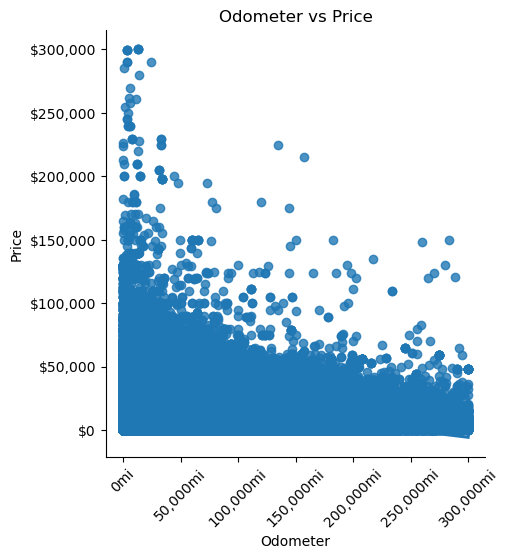

In [548]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Example: plotting 'odometer' vs 'price'
g = sns.lmplot(x='odometer', y='price', data=df)

# X = np.array(X)
# sorted_idx = np.argsort(X[:, 0])
# plt.plot(X[sorted_idx, 0], y_pred[sorted_idx], color='red', linewidth=2, label='Lasso Regression Line')

plt.title('Odometer vs Price')
plt.xlabel('Odometer')
plt.ylabel('Price')
ax = g.axes[0, 0]
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}mi'))

# ax.set_xticks(xticks)
ax.tick_params(axis='x', rotation=45)
plt.show()